# Numpy

Numpy es un módulo de cálculo numérico. Está escrito en C, por lo tanto es muy rápido, sin embargo su interfaz está muy bien diseñada para trabajar de manera *pythonica*.


__Contenidos:__

+ Arreglos multidimensionales, atributos y métodos
+ Cargar y salvar desde un archivo
+ Operaciones con arreglos
+ Funciones universales
+ Slicing

Para poder utilizar Numpy, debemos importar el módulo. Esto lo conseguimos con la siguiente línea:

In [13]:
import numpy as np

## Arreglos (arrays)

La principal estructura de datos ofrecida por Numpy son los arreglos. Se parecen a una lista, pero tiene las siguientes diferencias:

+ El número de elementos en un array es fijo (no se puede hacer `append()` o `remove()`)
+ Todos los elementos deben ser del mismo tipo.
+ No se pueden mezclar distintos tipos de datos en un mismo array y una vez que se crea, el tipo de datos no se puede cambiar

Las principales ventajas sobre las listas son:

+ Pueden ser n-dimensionales (vectores, matrices, tensores).
+ Soportan operaciones algebráicas y aritméticas.
+ Fueron pensados para cálculo científico, por lo tanto funcionan muy rápido.

In [14]:
# Crea un vector de ceros
zeros_1d = np.zeros(10)
print(zeros_1d)

# Crea una matriz de ceros
zeros_2d = np.zeros((3,3))
print(zeros_2d)

# Crea una matriz a partir de lista
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(matrix)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


- Nótese que los arrays se imprimen en consola de manera distinta a las listas, no hay comas entre los valores, sólo espacios
- No es necesario indicar el tipo de datos que se desea crear (como en el caso primero), por defecto se crean floats

- También se pueden crear arreglos multidimensionales

Hay muchas formas de crear arreglos en Numpy, puede explorarlas todas en este [enlace](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.array-creation.html). Las más comunes son:

| Función | Descripción |
|:--------|:------------|
| `empty` | Arreglo vacio (con los datos basura que haya en memoria) |
| `zeros` | Arreglo de ceros |
| `ones`  | Arreglo de unos |
| `full`  | Se especifica un valor para llenar todo el arreglo con él |
| `identity` | Unos en la diagonal y cero en el resto |
| `array` | Constructor genérico |
| `fromfunction` | Según una función dada que retorna un valor para cada punto de la coordenada |
| `loadtxt` | Carga los datos de un archivo |

### Ejemplo

Crear una matriz tamaño 4x4 y una matriz identidad. Comprobar que esta matriz es la identidad del producto de matrices.

In [15]:
# Cree una matriz 4x4
mat = np.array([[4,5,2,3],[4,5,2,3],[4,5,2,3],[4,5,2,3]])

# Cree la matriz identidad
ident = np.identity(4)

# Multiplicación de matrices
prod = np.dot(mat, ident)
print(prod)

# Sume una matriz de unos
#    x += 1 equivale a decir a x = x + 1
prod += 1
print(prod)

[[4. 5. 2. 3.]
 [4. 5. 2. 3.]
 [4. 5. 2. 3.]
 [4. 5. 2. 3.]]
[[5. 6. 3. 4.]
 [5. 6. 3. 4.]
 [5. 6. 3. 4.]
 [5. 6. 3. 4.]]


In [16]:
ident = np.identity(4)
ident.shape

(4, 4)

## Atributos y métodos de array

Los atributos de un objeto nos dicen cosas sobre él. Al igual que los métodos, se acceden con el operador punto. Los atributos más relevantes del objeto array se muestran en la tabla a continuación. Puede encontrar la documentación de los atributos [aquí](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html#array-attributes). Para todos los efectos, `a` es un arreglo cualquiera de numpy.

| Atributo | Descripción |
|:-------|:------------|
|`a.shape` | Retorna una tupla con el número de elementos por dimensión|
|`a.ndim`  | Número de dimensiones |
|`a.size`  | Número de elementos en el arreglo |
| `a.dtype`| Tipo de datos almacenados en el arreglo |
| `a.T`    | Transpuesta del arreglo |
| `a.real` | Parte real del arreglo |
| `a.imag` | Parte imaginaria del arreglo |
| `a.flat` | Colapsa el arreglo a 1 dimesión |

Existen otros métodos, que se exploran más adelante. Por ahora, la siguiente tabla muestra algunos tienen que ver con la *administración* del arreglo. Puede encontrar la documentación en este [enlace](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html#array-methods).

| Método | Descripción |
|:-------|:------------|
| `a.copy()` | Retorna una copia del arreglo |
| `a.fill()` | Llena el arreglo con el valor dado |
| `a.reshape()` | Retorna un arreglo con el shape solicitado, pero los mismos datos |
| `a.resize()` | Cambia el tamaño y shape del arreglo sin crear una copia |
| `a.sort()` | Ordena el arreglo |

### Ejemplo

In [17]:
# Cree una matriz NO cuadrada. Revise sus dimensiones con .shape
mat = np.array([[2,3,4],[6,8,1]])

# Utilice .reshape() para cambiar la forma de la matriz
mat_n = mat.reshape((3,2))
print(mat_n)

# Compruebe que .size es igual a np.prod(a.shape)
c = (mat_n.size == np.prod(mat_n.shape))
print(c)



[[2 3]
 [4 6]
 [8 1]]
True


## Creación de rangos

En muchas ocaciones es útil crear arreglos con rangos, por ejemplo, si se quiere modelar un fenómeno en función del tiempo de 1 a 10 s, es conveniente crear un arreglo `t` con pasos de 0.1s. Esto se consigue de la siguiente manera:

In [18]:
t = np.arange(0, 10, 0.1)
print(t)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


Puede explorar más sobre la creación de rangos en numpy en este [enlace](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.array-creation.html#numerical-ranges). Los más importantes son:

| Función | Descripción |
|:--------|:------------|
| `np.arange() `   | Retorna valores homogeneamente espaciados en el rango dado, según el paso indicado |
| `np.linspace()`  | Retorna el número de valores homogeneamente espaciados indicados en un intervalo dado |
| `np.logspace()`  | Semejante a `linspace`, pero con espaciamiento logarítmico |
| `np.geomspace()` | Semejante a `linspace`, siguiendo una progresión geométrica |
| `np.meshgrid()`  | Retorna los valores de una cuadricula |

## Operaciones

- Las operaciones de suma, resta, multiplicación y división de escalares se aplican a todos los elementos
- También algunas de las operaciones que se aplican a las listas normales, y otras operaciones más complejas

In [19]:
from numpy import array

a = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
a = a+5 # le suma el número 5 a todas las entradas del array
print (a)
print("\n-------Suma---------")
print (a.sum()) # suma todas las entradas del array
print("\n-------Máximo---------")
print (a.max()) # retorna el valor máximo
print("\n--------Mínimo--------")
print (a.min()) # retorna el valor mínimo
print("\n--------Raíz Cuadrada--------")
print (np.sqrt(a)) # retorna un array cuyos valores son la raíz cuadrada de cada uno de los valores del array original
print("\n--------Cant. Datos--------")
print (a.size) # retorna la cantidad de datos que tiene el array
print("\n-------Forma del array---------")
tamaño_x = a.shape
print(len(tamaño_x))
print (tamaño_x) # retorna la forma que tienen los datos en el array, si tiene más de una dimensión, devuelve la magnitud máxima de cada una
print("\n-------Cambiar el array de forma---------")
a = a.reshape((3,4))
print(a.shape)
print (a.size)
tamaño_x, tamaño_y = a.shape
print(tamaño_x)
print(tamaño_y)
print("\n-------Así se ve el array luego de cambiar de forma---------")
print (a)

[ 6  7  8  9 10 11 12 13 14 15 16 17]

-------Suma---------
138

-------Máximo---------
17

--------Mínimo--------
6

--------Raíz Cuadrada--------
[2.44948974 2.64575131 2.82842712 3.         3.16227766 3.31662479
 3.46410162 3.60555128 3.74165739 3.87298335 4.         4.12310563]

--------Cant. Datos--------
12

-------Forma del array---------
1
(12,)

-------Cambiar el array de forma---------
(3, 4)
12
3
4

-------Así se ve el array luego de cambiar de forma---------
[[ 6  7  8  9]
 [10 11 12 13]
 [14 15 16 17]]


## Leer y guardar datos de un archivo

Muchas veces nuestros datos de entrada estarán almacenados en un archivo, posiblemente fueron la salida de otro programa. Numpy facilita cargar un archivo `csv` directamente a un arreglo.

El formato `csv` no es un estándar, pero expresa una idea. Se parece a un archivo excel, donde cada valor está separado por un *caracter separador*, generalmente una coma, y cada línea tiene un *caracter de cambio de línea*, generalmente un `\n`. Por ejemplo:

Para cargar un archivo `csv` se utiliza la función `loadtxt()`, puede encontrar la documentación en este [enlace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). Intente carga el archivo `prueba_cargar.csv` e imprimirlo:

In [20]:
f = 'prueba_cargar.txt'

arr = np.loadtxt(f, delimiter=",")
print(arr)

FileNotFoundError: ignored

Otra acción importante es poder guardar nuestros resultados en un archivo, para esto, numpy ofrece la función `savetxt`, que funciona de manera análoga a `loadtxt`. Puede encontrar la documentación [aquí](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html). Ahora cree un rango de 0 a 100 con 10 000 valores y guárdelos en un archivo llamado `tiempo_test.csv`.

In [ ]:
f = 'tiempo_test.txt'

# Cree el vector con el rango
arr = np.arange(0, 1000, 0.01)

# Sálvelo usando np.savetxt, use la coma como separador
np.savetxt(f, arr, delimiter=",")

## Operaciones

En términos generales, los arreglos de numpy se comportan como matrices de álgebra lineal. Solo tenga presente cuando una operación se realiza *entrada por entrada*.

Algunos ejemplos:

In [21]:
# Suma escalar, entrada por entrada
a = np.ones(10)
a = a + 10
print('a + 10')
print(a)

# Suma de vectores
b = np.full(10, 14)
c = a + b
print('c = a + b')
print(c)

# Multiplicacion escalar, entrada por entrada
d = 0.5 *a
print('d = 0.5 * a')
print(d)

# Multiplicación de vectores ¡Se hace entrada por entrada!
e = np.array([0,1,2,3,4,5,6,7,8,9])
f = np.ones((3,10))
h = e * f
print('h = e * f')
print(h)

# Multiplicación de matrices
i = np.array([9,8,7])
j = i.dot(h)
print('j = i matmul j')
print(j)

a + 10
[11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
c = a + b
[25. 25. 25. 25. 25. 25. 25. 25. 25. 25.]
d = 0.5 * a
[5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5]
h = e * f
[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]]
j = i matmul j
[  0.  24.  48.  72.  96. 120. 144. 168. 192. 216.]


## Operaciones de reducción

Suelen expresarse como métodos del objeto array. En general, tienen como consecuencia disminuir las dimensiones del arreglo y son muy utilizados en matemáticas y física. Por ejemplo, el producto interno (producto punto) es una operación de reducción.

La siguiente tabla muestra los más utilizados, puede encontrar la documentación [aquí](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html#calculation).

| Operación | Descripción |
|:----------|:------------|
| `a.argmax()` | Retorna el índice donde ocurren los valores máximos de cada eje |
| `a.min()`    | Retorna el valor mínimo de un eje |
| `a.argmin()` | Retorna el índice donde ocurren los valores mínimos de cada eje |
| `a.ptp()`    | Valor pico a pico en un eje |
| `a.conj()`   | Retorna el conjugado complejo de todos los elementos |
| `a.round()`  | Retorna el valor redondeado de cada elemento |
| `a.trace()`  | Retorna la suma de las diagonales del arreglo |
| `a.sum()`    | Retorna la suma del arreglo en el eje dado |
| `a.cumsum()` | Retorna la suma acumulativa en un eje dado |
| `a.mean()`   | Retorna la media aritmética en un eje dado |
| `a.var()`    | Retorna la varianza en un eje dado|
| `a.std()`    | Retorna la desviación estándar en un eje dado |
| `a.prod()`   | Retorna el producto en un eje dado |
| `a.cumprod()`| Retorna el producto acumulativo en un eje dado |


In [26]:
edad_participantes = [10,13,17,48,75,21,32,98,75,54,66,84,12,9,32,67,56,29,45,70]

# Transforme la lista a un arreglo de Python
edad_participantes = np.array(edad_participantes)


# Cambie la forma del arreglo
edad_participantes2x10 = edad_participantes.reshape(2,10)

# Obtenga los siguientes valores GLOBALES:
#    - Máxima
#    - Mínima
#    - Valor pico a pico
#    - suma
#    - media
#    - desviación estándar



# Repita la sección anterior pero en la dimensión 0 (por filas)
print(edad_participantes2x10)
print(edad_participantes2x10.max(0))



[[10 13 17 48 75 21 32 98 75 54]
 [66 84 12  9 32 67 56 29 45 70]]
[66 84 17 48 75 67 56 98 75 70]


## Funciones universales

Son operaciones muy rápidas que se aplican a todas las entradas de un arreglo, por ejemplo, raíz cuadrada, seno, logaritmo. También incluyen los operadore de comparación y operadores lógicos (mayor que, menor que, and, or, ...). Deben usarse tanto como sea posible. Puede encontrar la lista completa de funciones universales en este [enlace](https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html#math-operations)

In [27]:
a = np.linspace(0,10,11)
print('Original: ' + str(a))
a = np.power(a, 2)
print('a^2: ' + str(a))
a = np.sqrt(a)
print('raiz cuadrada: ' + str(a))
a = np.sin(a)
print('sin(a): ' + str(a))

Original: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
a^2: [  0.   1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]
raiz cuadrada: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
sin(a): [ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849 -0.54402111]


## Sintaxis de *slicing*

Al igual que las listas, los arreglos de numpy permiten acceso indexado y *slicing*, pero su modelo es superior y más flexible. Un slice se puede obtener siguiendo la construcción `inicio:final:paso`.  

In [28]:
a = np.linspace(0, 10, 11)

# todos
print(a[:])

# en la posición 4 = 11 - 7
print(a[-7])

# de 3 a 8
print(a[3:8])

# de 1 a 9 en pasos de dos (los impares)
print(a[1:11:2])

# También soporta índeces negativos
print(a[3:-2:2])

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
4.0
[3. 4. 5. 6. 7.]
[1. 3. 5. 7. 9.]
[3. 5. 7.]


Una forma muy común de slicing es tomar todos los anteriores o todos los posteriores a un índice dado:

In [29]:
# desde cero hasta 5-1
print(a[:5])

# desde 5 hasta el final
print(a[5:])

[0. 1. 2. 3. 4.]
[ 5.  6.  7.  8.  9. 10.]


Una forma avanzada es utilizar una condición booleana para seleccionar los elementos:

In [30]:
# todos los valores mayores a 4
print(a[a > 4] + 6)

[11. 12. 13. 14. 15. 16.]


Cuando los arreglos son multidimensionales, se utiliza coma para separar los índices dentro de los paréntesis cuadrados. A cada índice se le puede aplicar una operación de slicing. `:` significa todo.

In [ ]:
mat = np.arange(0, 20, 1).reshape((4,5))
print(mat)
print(mat[1:4, 3:])

### Más sobre matrices



#### Multiplicación Matriz-vector y matriz-matriz

COnsideramos la matriz $A$:

$$
A  =
\begin{bmatrix}
3.4 & 2.6 \\
2.1 & 4.5
\end{bmatrix}
$$

y el vector $x$:

$$
x  =
\begin{bmatrix}
0.2 \\ -1.1
\end{bmatrix}
$$

In [31]:
A = np.array([[3.4, 2.6], [2.1, 4.5]])
print("Matriz A:\n {}".format(A))

x = np.array([0.2, -1.1])
print("Vector x:\n {}".format(x))

Matriz A:
 [[3.4 2.6]
 [2.1 4.5]]
Vector x:
 [ 0.2 -1.1]


Calculemos el producto $y = Ax$ :

In [32]:
y = A.dot(x)
print(y)

[-2.18 -4.53]


Calculemos la multiplicación $C = AB$, donde $A$, $B$, and $C$ son matrices:

In [33]:
B = np.array([[1.3, 0], [0, 2.0]])

C = A.dot(B)
print(C)

[[4.42 5.2 ]
 [2.73 9.  ]]


También podemos utilizar el operador @ (nuevo a partir python 3.5)

In [34]:


B = np.array([[9,8],
              [7,6],
              [5,4]])
print(np.dot(A,B))
print(A @ B)

[[ 38  32]
 [101  86]]
[[ 38  32]
 [101  86]]


In [38]:
A = np.array([[1,2],
              [4,5]])

La inversa de una matriz ($A^{-1}$) y su determinante  ($\det(A)$) se pueden obtener su utilizamos el módulo de NumPy s `linalg`:

In [39]:
Ainv = np.linalg.inv(A)
print("Inversa de A:\n {}".format(Ainv))

Adet = np.linalg.det(A)
print("Determinante de A: {}".format(Adet))

Inversa de A:
 [[-1.66666667  0.66666667]
 [ 1.33333333 -0.33333333]]
Determinante de A: -2.9999999999999996



Una matriz Identidad  $I$. se puede crear utilizando

In [40]:
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


## Resolución de un sistea de ecuaciones lineales
Mediante el uso de matrices podemos resolver ecuaciones lineales. For ejemplo, consideremos el sistema de ecuaciones:

\begin{equation}2x + 4y = 18\end{equation}
\begin{equation}6x + 2y = 34\end{equation}

Escrito en forma de matrices sería:

\begin{equation}\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix} \cdot \begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

Notemos que las variables (***x*** and ***y***) se escriben como una columna de matriz (vector), que se multiplica por una matriz de coeficientes y se obtiene como resultado una matriz con los valores de las incógnitas. Si calculamos el producto punto en el lado izquierdo podemos ver claramente que representa el sistema de ecuaciones original:

\begin{equation}\begin{bmatrix}2x + 4y\\6x + 2y\end{bmatrix} =\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

Demos nombre a nuestras matrices:

\begin{equation}A=\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix}\;\;\;\;X=\begin{bmatrix}x\\y\end{bmatrix}\;\;\;\;B=\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

Sabemos que ***A • X = B***, que aritméticamente representa ***X = B ÷ A***. Como la división de una matriz implica la multiplicación por su inversa, podemos encontrar los valores de nuestras variables (*X*) como: ***X = A<sup>-1</sup> • B***

Primero necesitamos calcular la inversa de A:

\begin{equation}\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix}^{-1} = \frac{1}{(2\times2)-(4\times6)}  \begin{bmatrix}2 & -4\\-6 & 2\end{bmatrix}\end{equation}

\begin{equation}= \frac{1}{-20}  \begin{bmatrix}2 & -4\\-6 & 2\end{bmatrix}\end{equation}

\begin{equation}=\begin{bmatrix}-0.1 & 0.2\\0.3 & -0.1\end{bmatrix}\end{equation}

Ahora la multiplicamos por B:

\begin{equation}X = \begin{bmatrix}-0.1 & 0.2\\0.3 & -0.1\end{bmatrix} \cdot \begin{bmatrix}18\\34\end{bmatrix}\end{equation}

\begin{equation}X = \begin{bmatrix}(-0.1 \times 18)+(0.2 \times 34)\\(0.3\times18)+(-0.1\times34)\end{bmatrix}\end{equation}

\begin{equation}X = \begin{bmatrix}5\\2\end{bmatrix}\end{equation}

La matriz resultante (*X*) contiene los valores de  *x* and *y* variables, que lo podemos comprobar mediante las ecuaciones originales:

\begin{equation}(2\times5) + (4\times2) = 18\end{equation}
\begin{equation}(6\times5) + (2\times2) = 34\end{equation}

Que se convierte simplemente en:

\begin{equation}10 + 8 = 18\end{equation}
\begin{equation}30 + 4 = 34\end{equation}


Utilizando NUmpy esto es tan simple como:

In [41]:
A = np.array([[2,4],
              [6,2]])

B = np.array([[18],
              [34]])

X = np.dot(np.linalg.inv(A), B)
print(X)

[[5.]
 [2.]]


O bien

In [43]:

A = np.array([[2,4],
              [6,2]])

B = np.array([[18],
              [34]])

X = np.linalg.inv(A) @ B

print(X)

[[5.]
 [2.]]


O también utilizando el método **linalg.solve**

In [44]:
X = np.linalg.solve(A, B)
print(X)

[[5.]
 [2.]]



<p>Para más información, ver <a href="#ref">Numpy Quickstart tutorial</a></p>


# Matplotlib

### Es una biblioteca de graficación para Python
### Provee una manera rápida de visualizar datos

- En los cuadernos de jupyter es necesario indicar que la visualización se debe de hacer en las celdas del cuaderno de esta forma --> %matplotlib inline
- Se pueden graficar funciones en dominios limitados (y discretos)


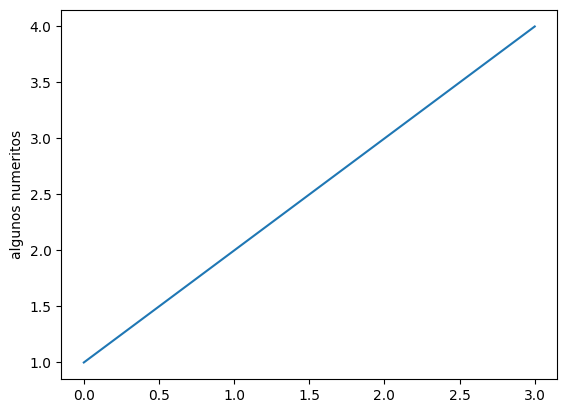

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('algunos numeritos')
plt.show()

+ Noten que el eje X tiene un rango automático porque si se provee una única lista de números, se asume que es una secuencia de valores en 'y', los valores en 'x' se generan de forma automática (empezando desde 0)

`plot()` es un comando muy versátil, puede tomar un conjunto arbitratio de argumentos. Por ejemplo, para graficar x contra y, se puede hacer de la siguiente forma:

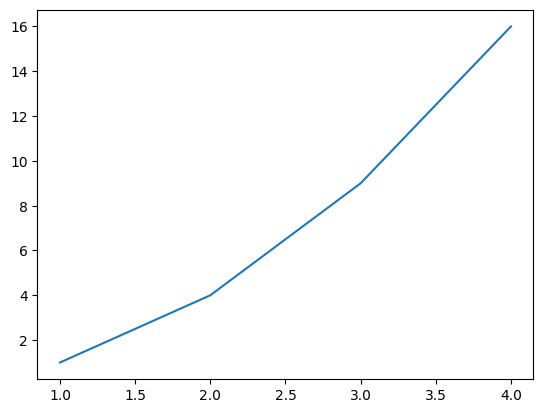

In [46]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

+ Para cada par x,y existe un tercer parámetro (opcional), que es un string que indica el color y el tipo de línea del gráfico, el valor por defecto es 'b-', que es una línea azul, pero se puede especificar cualquier otra opción dentro de un conjunto de posibilidades:


<img src="imagenes/lines.png", width=300, height=300>
<img src="imagenes/colors.png", width=120, height=120>


In [ ]:
plt.plot([1,2,3,4], [1,4,9,16], 'g^')
plt.show()

+ El comando **`plt.axis()`** recibe una lista con 4 argumentos que nos ayuda a delimitar el rango de los ejes de los gráficos

In [ ]:
plt.plot([1,2,3,4], [1,4,9,16], 'm:')
plt.axis([0, 6, 0, 20])
plt.show()

### Claro que matplotlib también funciona con los arreglos de NumPy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# intervalos
t = np.arange(0.0, 5.0, 0.2)

# líneas punteadas rojas, cuadrados azules and triángulos verdes
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

Para trabajar con múltiples figuras, se pueden utilizar subplots:

In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

Los datos pueden ser leidos de un archivo y de una vez graficados

In [ ]:
%matplotlib inline
from numpy import loadtxt
datos = loadtxt("prueba.csv")
print(datos)
x = datos[:,0]
y = datos[:,1]
plt.plot(x,y)
plt.show()

Utilizando la función **`plt.savefig(filename, dpi=72)`** se pueden guardan las figuras generadas a archivos para su uso fuera de python.